## Long running normal operation with a telegraf overlay

In [1]:
import plot_utils
import rolling_funcs
from plot_utils import LogFile,LogFileType,Roller,Fig

WINDOW_SECS = 20.0

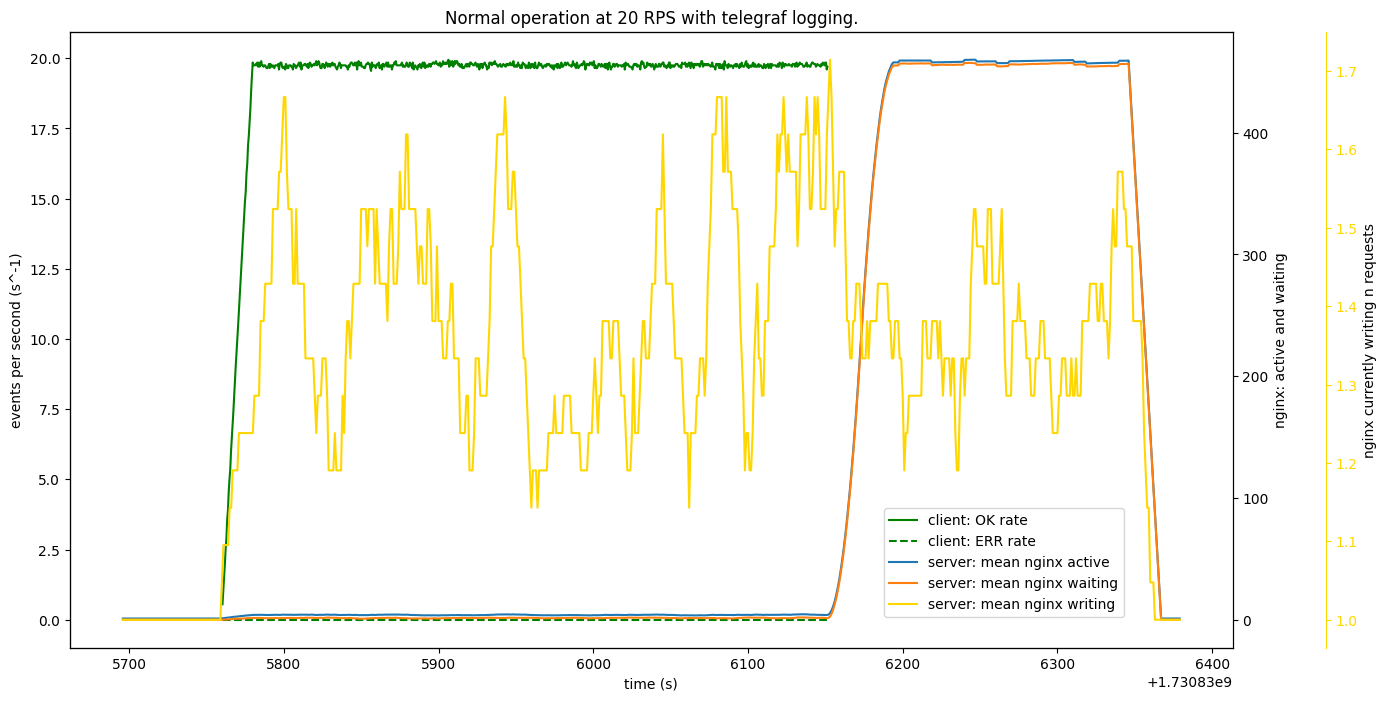

In [11]:
fig,ax = plot_utils.fig([
    Fig(title="Normal operation at 20 RPS with telegraf logging.",x="time (s)",y="events per second (s^-1)")
])

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path="./logs/hilbert/2024-11-05_19-42.json",
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path="./logs/hilbert/2024-11-05_19-42.json",
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})
client_log = LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-11-05_19-42-39.899347.txt",kwargs={'color':'g'})

mean_roller = Roller('mean', rolling_funcs.mean)

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
ax_active,ax_writing = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('nginx currently writing n requests','gold')]
)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_writing, {'server': nginx_writing}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_writing], loc=[0.7,0.05])
fig.savefig('./plots/20RPS.png')

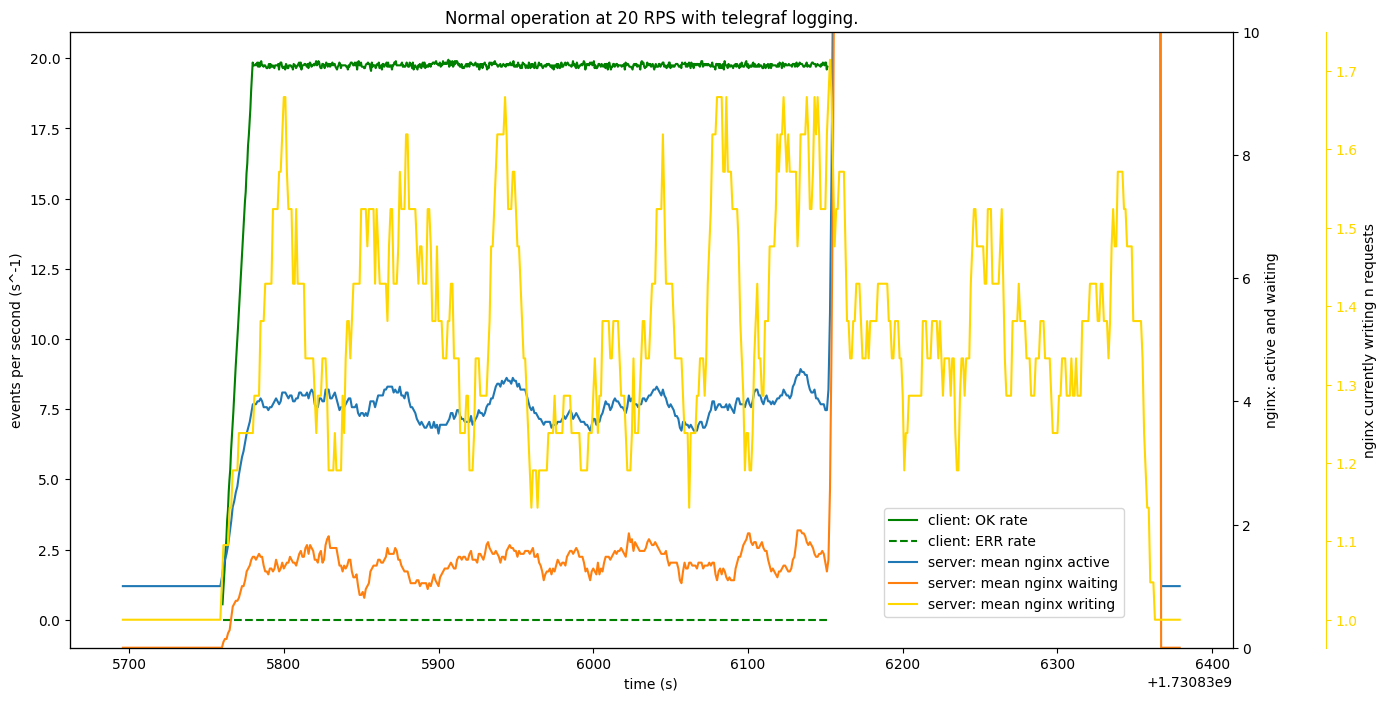

In [18]:
# zoom in to show nginx active and waiting
ax_active.set_ylim(0,10)
fig.savefig('./plots/20RPS_zoom.png')
fig

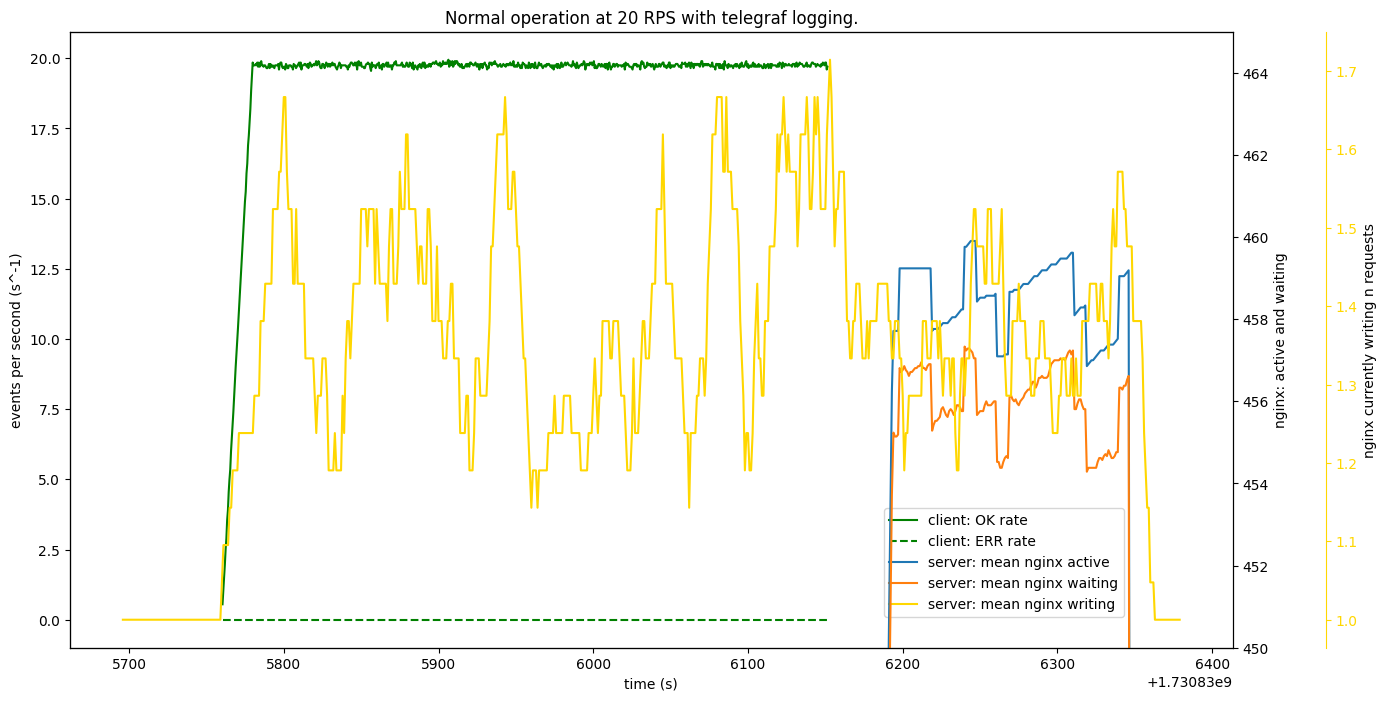

In [17]:
# zoom in to show nginx active and waiting
ax_active.set_ylim(450,465)
fig.savefig('./plots/20RPS_zoom_2.png')
fig